<a href="https://colab.research.google.com/github/AndreYang333/ExplainableAI/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4
## Minjie Yang(my189)
## Link to github: https://github.com/AndreYang333/ExplainableAI.git
## Link to reference code:https://github.com/AIPI-590-XAI/Duke-AI-XAI/tree/main/interpretable-ml-example-notebooks
## Link to colab: https://colab.research.google.com/github/AndreYang333/ExplainableAI/blob/main/Assignment4.ipynb#scrollTo=fovZSNkwbWos

# Model preparation

In [ ]:
# Import required libraries
!pip install git+https://github.com/csinva/imodels --user
!pip install scikit-learn==1.4.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Cloning https://github.com/csinva/imodels to /tmp/pip-req-build-y_n2vvhr
  Running command git clone --filter=blob:none --quiet https://github.com/csinva/imodels /tmp/pip-req-build-y_n2vvhr
  Resolved https://github.com/csinva/imodels to commit 7581f435e7e9d991643cbdef850e4e31e69ebdb7
  Preparing metadata (setup.py) ... done


In [ ]:
from imodels import RuleFitClassifier, C45TreeClassifier, GreedyTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Link to dataset:https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code

In [ ]:
import zipfile
import os

zip_file_path = 'archive.zip'  # File to unload
extract_path = 'telco-customer-churn'     # File to save

# Upzip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

df = pd.read_csv('/content/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = df[['gender','Dependents','Partner','tenure', 'MonthlyCharges','Churn']]
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,gender,Dependents,Partner,tenure,MonthlyCharges,Churn
0,Female,No,Yes,1,29.85,No
1,Male,No,No,34,56.95,No
2,Male,No,No,2,53.85,Yes
3,Male,No,No,45,42.30,No
4,Female,No,No,2,70.70,Yes


In [ ]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0) # 1 for Male and 0 for Female
df = df.replace({'Yes': 1, 'No': 0}) # Transform all the dummy variables to 1 and 0. Yes for 1 and No for 0
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,gender,Dependents,Partner,tenure,MonthlyCharges,Churn
0,0,0,1,1,29.85,0
1,1,0,0,34,56.95,0
2,1,0,0,2,53.85,1
3,1,0,0,45,42.30,0
4,0,0,0,2,70.70,1


In [ ]:
# Determine independent and dependent variables.
features = [col for col in df.columns if col != 'Churn']
X = df[features]
y = df['Churn']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# RuleFit Model

In [ ]:
# use RuleFit model
rulefit_model = RuleFitClassifier()
rulefit_model.fit(X_train, y_train)

# predict and evaluate
y_pred_rulefit = rulefit_model.predict(X_test)
print("RuleFit Accuracy:", accuracy_score(y_test, y_pred_rulefit))
print("RuleFit Classification Report:\n", classification_report(y_test, y_pred_rulefit))



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RuleFit Accuracy: 0.7815602836879433
RuleFit Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.87       511
           1       0.77      0.29      0.43       194

    accuracy                           0.78       705
   macro avg       0.78      0.63      0.65       705
weighted avg       0.78      0.78      0.74       705



## Result Analysis
Accuracy: The RuleFit model achieved an overall accuracy of 78.16% on the test set.

The model performs very well in predicting Class 0, with high precision and recall.

The model struggles with Class 1, showing low recall, indicating many false negatives.

The dataset is imbalanced (more Class 0 samples than Class 1), leading to biased predictions towards Class 0.

## Algorithm demonstration:

Assuming the dataset has \( m \) samples and \( n \) features. The Rule Based Model first trains \( M \) decision tree models (where \( M != m \)), generating a total of \( K \) rules, represented as \( r1(x), r2(x), ..., rK(x) \). Then, these rules are used as new variables in a linear regression model.
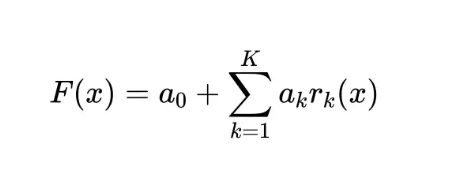  

When combining coefficients
𝑎0,
𝑎1...
,𝑎𝐾,
L1 regularization is added to the loss function. Through variable selection,
w rule variables are retained, and the corresponding coefficients are output.

The Rule & Linear Based Model is built on top of the Rule Based Model, incorporating n features into linear regression. The target function becomes:
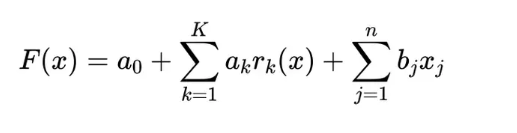
Similarly, L1 regularization is added to the loss function to select important variables p≤n. The final model uses w rules and p features, referred to as rule variables and feature variables.

## Visual Explanation
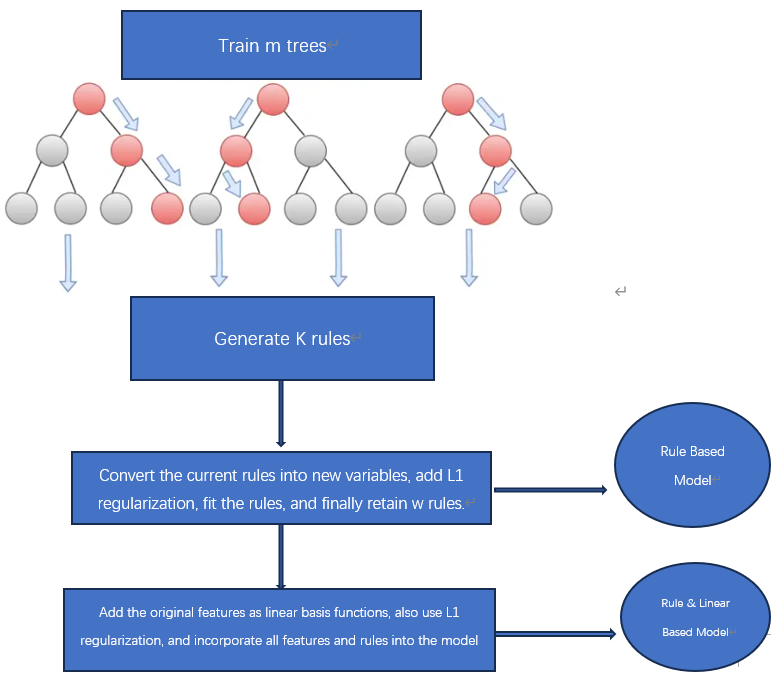

# C4.5 Rule Tree

In [ ]:
# C4.5 Rule Tree Model
c45_model = C45TreeClassifier()
c45_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred_c45 = c45_model.predict(X_test)
print("C4.5 Rule Tree Accuracy:", accuracy_score(y_test, y_pred_c45))
print("C4.5 Rule Tree Classification Report:\n", classification_report(y_test, y_pred_c45))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C4.5 Rule Tree Accuracy: 0.723404255319149
C4.5 Rule Tree Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       511
           1       0.50      0.50      0.50       194

    accuracy                           0.72       705
   macro avg       0.65      0.65      0.65       705
weighted avg       0.72      0.72      0.72       705



## Result Analysis
The model performs well in predicting Class 0 but struggles with Class 1, as indicated by the lower precision and recall. The overall accuracy is mainly influenced by the performance on the majority class (Class 0)

## Algorithm Demonstration

The algorithm selects the best features based on the information gain ratio.
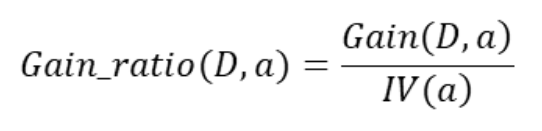
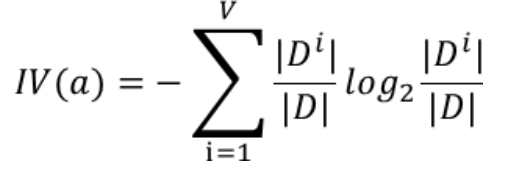
It recursively splits the data into subsets, creating branches until all instances in a subset belong to the same class or the predefined stopping criteria are met.

## Visual Explanation

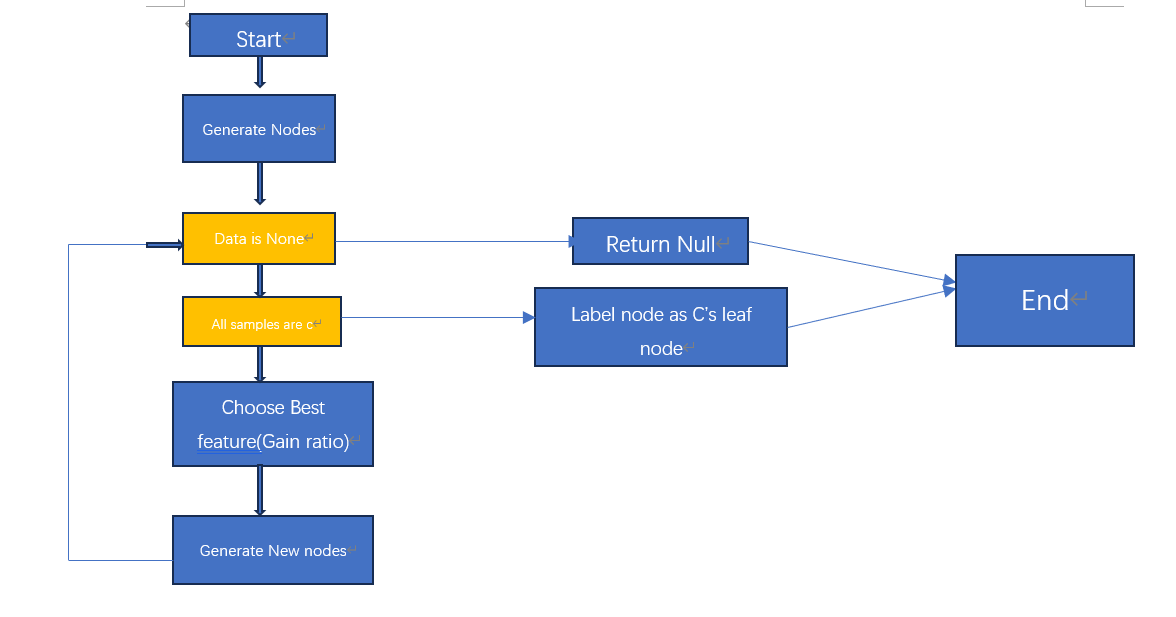

# Greedy Rule Tree

In [ ]:

# Greedy Rule Tree model
greedy_model = GreedyTreeClassifier()
greedy_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred_greedy = greedy_model.predict(X_test)
print("Greedy Rule Tree Accuracy:", accuracy_score(y_test, y_pred_greedy))
print("Greedy Rule Tree Classification Report:\n", classification_report(y_test, y_pred_greedy))


Greedy Rule Tree Accuracy: 0.7347517730496453
Greedy Rule Tree Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       511
           1       0.52      0.51      0.51       194

    accuracy                           0.73       705
   macro avg       0.67      0.67      0.67       705
weighted avg       0.73      0.73      0.73       705



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Result Analysis
The model achieved an overall accuracy of 73.47%.

The model performs well in identifying Class 0 with high precision and recall.

The model struggles with Class 1, indicating difficulty in distinguishing these samples, likely due to class imbalance.

Macro Average: The macro average of precision, recall, and F1-score is around 0.67, showing balanced performance across both classes.

Weighted Average: The weighted average is aligned with overall accuracy at 0.73, suggesting the model's performance is more influenced by Class 0 due to its higher support.

The model performs better on the majority class (Class 0) but has reduced effectiveness on the minority class (Class 1). Further improvements could include addressing class imbalance or optimizing the tree's complexity.

## Algorithm Demonstration

The algorithm selects the best features based on the information GINI Index.
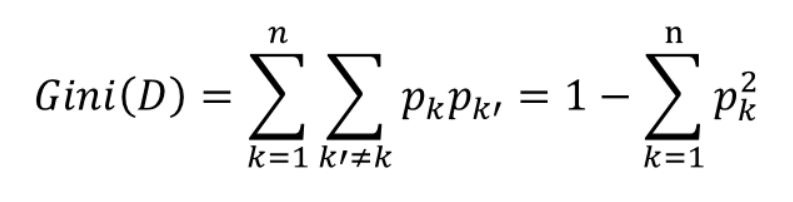
It recursively splits the data into subsets, creating branches until all instances in a subset belong to the same class or the predefined stopping criteria are met.CART decision trees are strictly binary, meaning each node can only split into two child nodes. In contrast, C4.5 can create multi-way splits, allowing a node to split into more than two child nodes based on the feature values, making it more flexible in handling categorical features.

## Visual Explanation

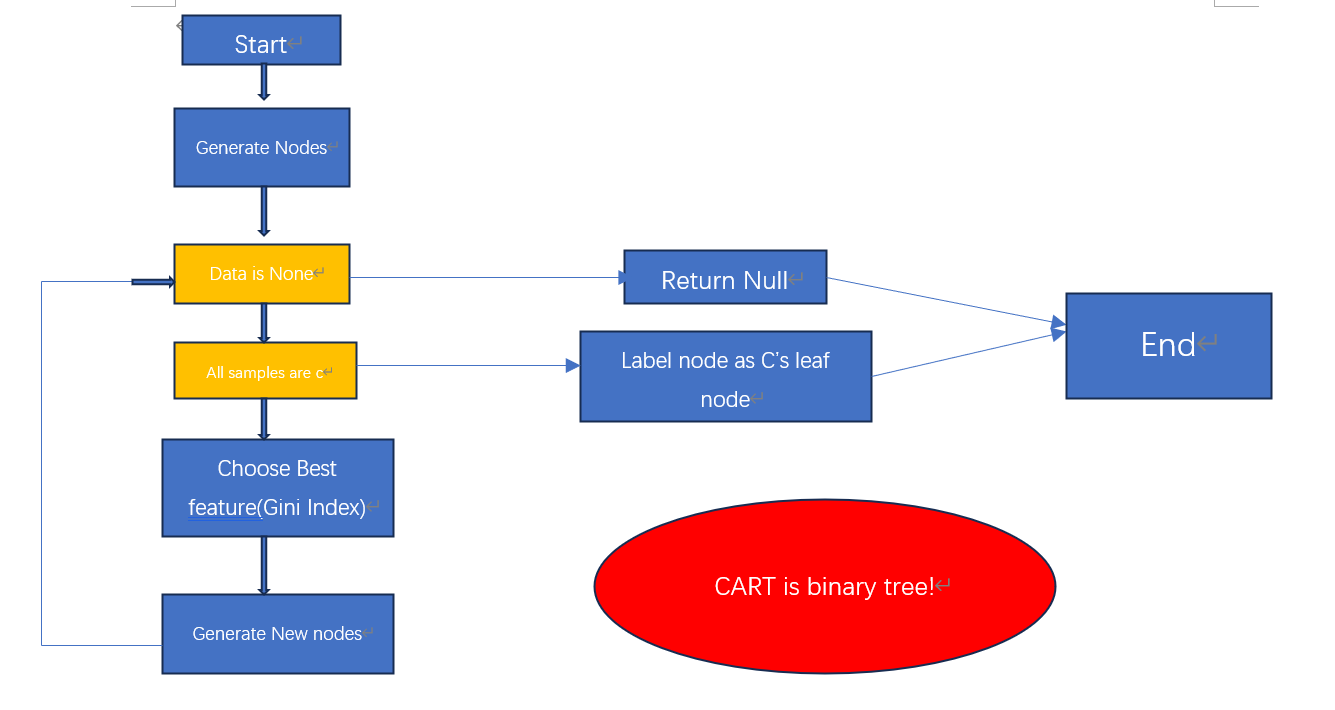